<a href="https://colab.research.google.com/github/Fatimatic/machine-learning/blob/main/GradientDescentForLinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import math, copy
import matplotlib.pyplot as plt
import numpy as np


In [3]:
x_train= np.array([1.0,2.0])
y_train= np.array([300.0,500.0])

In [5]:
# Compute_Cost
def compute_cost(x,y,w,b):
    m=x.shape[0]
    cost=0
    for i in range(m):
        f_wb=w*x[i]+b
        cost=cost+(f_wb-y[i])**2
    total_cost=1/(2*m)*cost
    return total_cost

In [9]:
# compute_gradient
def compute_gradient(x,y,w,b):
     m=x.shape[0]
     dj_dw=0; dj_db=0;
     for i in range(m):
         f_wb= w*x[i] +b
         dj_dw_i=(f_wb-y[i])*x[i]
         dj_db_i =(f_wb-y[i])
         dj_dw+=dj_dw_i
         dj_db += dj_db_i
         dj_dw=(dj_dw)/m
         dj_db= (dj_db)/m

         return dj_dw, dj_db

# Helper function to plot gradient
def add_line(dj_dw, w, j, x_range, ax):
    x = np.linspace(w - x_range, w + x_range, 100)
    y = j + dj_dw * (x - w)
    ax.plot(x, y, '--', color='grey')

def plt_gradients(x_train,y_train, f_compute_cost, f_compute_gradient):
    #===============
    #  First subplot
    #===============
    fig,ax = plt.subplots(1,2,figsize=(12,4))

    # Print w vs cost to see minimum
    fix_b = 100
    w_array = np.linspace(-100, 500, 50)
    w_array = np.linspace(0, 400, 50)
    cost = np.zeros_like(w_array)

    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = f_compute_cost(x_train, y_train, tmp_w, fix_b)
    ax[0].plot(w_array, cost,linewidth=1)
    ax[0].set_title("Cost vs w, with gradient; b set to 100")
    ax[0].set_ylabel('Cost')
    ax[0].set_xlabel('w')

    # plot lines for fixed b=100
    for tmp_w in [100,200,300]:
        fix_b = 100
        dj_dw,dj_db = f_compute_gradient(x_train, y_train, tmp_w, fix_b )
        j = f_compute_cost(x_train, y_train, tmp_w, fix_b)
        add_line(dj_dw, tmp_w, j, 30, ax[0])

    #===============
    # Second Subplot
    #===============

    tmp_b,tmp_w = np.meshgrid(np.linspace(-200, 200, 10), np.linspace(-100, 600, 10))
    U = np.zeros_like(tmp_w)
    V = np.zeros_like(tmp_b)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            U[i][j], V[i][j] = f_compute_gradient(x_train, y_train, tmp_w[i][j], tmp_b[i][j] )
    X = tmp_w
    Y = tmp_b
    n=-2
    color_array = np.sqrt(((V-n)/2)**2 + ((U-n)/2)**2)

    ax[1].set_title('Gradient shown in quiver plot')
    Q = ax[1].quiver(X, Y, U, V, color_array, units='width', )
    ax[1].quiverkey(Q, 0.9, 0.9, 2, r'$2 \frac{m}{s}$', labelpos='E',coordinates='figure')
    ax[1].set_xlabel("w"); ax[1].set_ylabel("b")

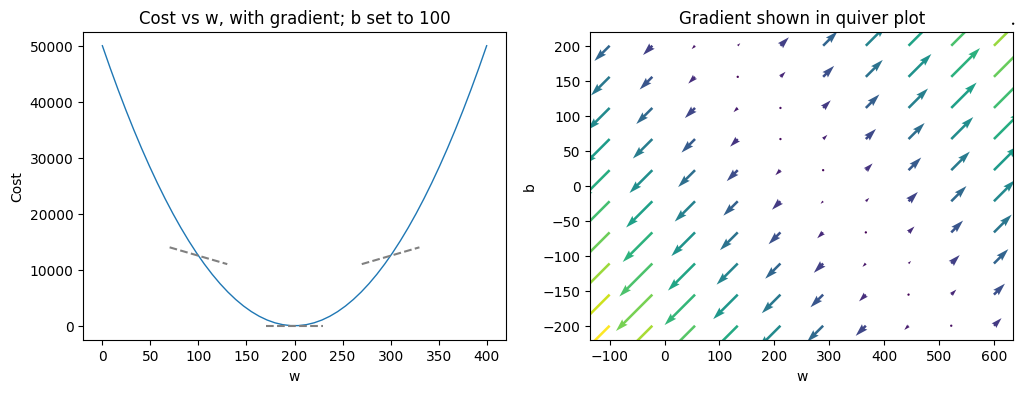

In [10]:


plt_gradients(x_train,y_train, compute_cost, compute_gradient)
plt.show()

In [11]:
# gradient_descent
def gradient_descent(x,y,w_in,b_in,alpha,num_iters,compute_cost,compute_gradient):
    w = copy.deepcopy(w_in)  # avoid modifying global w_in
    J_history= []
    p_history = []

    w= w_in
    b= b_in
    for i in range(num_iters):
      dj_dw,dj_db=compute_gradient(x,y,w,b)
      w=w-alpha*dj_dw
      b=b-alpha*dj_db
      if i<100000:
        J_history.append(compute_cost(x,y,w,b))
        p_history.append([w,b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history #return w and J,w history for graphing


In [12]:
# initialize parameters
w_init = 0
b_init = 0
# some gradient descent settings
iterations = 10000
tmp_alpha = 1.0e-2
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)
print(f"(w,b) found by gradient descent: ({w_final:8.4f},{b_final:8.4f})")

Iteration    0: Cost 8.34e+04  dj_dw: -1.500e+02, dj_db: -1.500e+02   w:  1.500e+00, b: 1.50000e+00
Iteration 1000: Cost 6.25e+02  dj_dw: -6.476e-03, dj_db: -6.476e-03   w:  1.500e+02, b: 1.49994e+02
Iteration 2000: Cost 6.25e+02  dj_dw: -2.796e-07, dj_db: -2.796e-07   w:  1.500e+02, b: 1.50000e+02
Iteration 3000: Cost 6.25e+02  dj_dw: -1.211e-11, dj_db: -1.211e-11   w:  1.500e+02, b: 1.50000e+02
Iteration 4000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02
Iteration 5000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02
Iteration 6000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02
Iteration 7000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02
Iteration 8000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02
Iteration 9000: Cost 6.25e+02  dj_dw: -1.421e-12, dj_db: -1.421e-12   w:  1.500e+02, b: 1.50000e+02


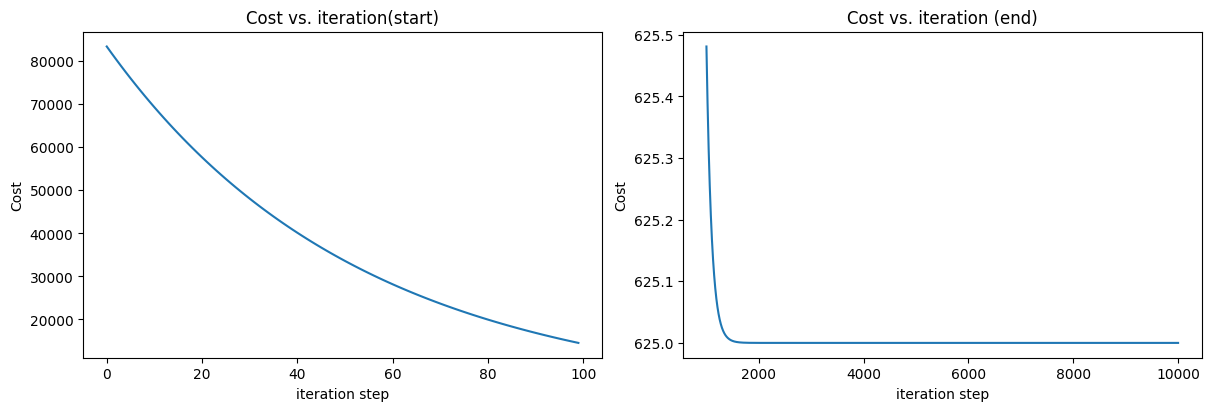

In [13]:
# plot cost versus iteration
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(J_hist[:100])
ax2.plot(1000 + np.arange(len(J_hist[1000:])), J_hist[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost')
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step')
plt.show()

In [14]:
#Prediction
print(f"1000 sqft house prediction {w_final*1.0 + b_final:0.1f} Thousand dollars")
print(f"1200 sqft house prediction {w_final*1.2 + b_final:0.1f} Thousand dollars")
print(f"2000 sqft house prediction {w_final*2.0 + b_final:0.1f} Thousand dollars")

1000 sqft house prediction 300.0 Thousand dollars
1200 sqft house prediction 330.0 Thousand dollars
2000 sqft house prediction 450.0 Thousand dollars


In [15]:
# initialize parameters
w_init = 0
b_init = 0
# set alpha to a large value
iterations = 10
tmp_alpha = 8.0e-1
# run gradient descent
w_final, b_final, J_hist, p_hist = gradient_descent(x_train ,y_train, w_init, b_init, tmp_alpha,
                                                    iterations, compute_cost, compute_gradient)

Iteration    0: Cost 5.80e+03  dj_dw: -1.500e+02, dj_db: -1.500e+02   w:  1.200e+02, b: 1.20000e+02
Iteration    1: Cost 1.19e+03  dj_dw: -3.000e+01, dj_db: -3.000e+01   w:  1.440e+02, b: 1.44000e+02
Iteration    2: Cost 7.20e+02  dj_dw: -6.000e+00, dj_db: -6.000e+00   w:  1.488e+02, b: 1.48800e+02
Iteration    3: Cost 6.43e+02  dj_dw: -1.200e+00, dj_db: -1.200e+00   w:  1.498e+02, b: 1.49760e+02
Iteration    4: Cost 6.29e+02  dj_dw: -2.400e-01, dj_db: -2.400e-01   w:  1.500e+02, b: 1.49952e+02
Iteration    5: Cost 6.26e+02  dj_dw: -4.800e-02, dj_db: -4.800e-02   w:  1.500e+02, b: 1.49990e+02
Iteration    6: Cost 6.25e+02  dj_dw: -9.600e-03, dj_db: -9.600e-03   w:  1.500e+02, b: 1.49998e+02
Iteration    7: Cost 6.25e+02  dj_dw: -1.920e-03, dj_db: -1.920e-03   w:  1.500e+02, b: 1.50000e+02
Iteration    8: Cost 6.25e+02  dj_dw: -3.840e-04, dj_db: -3.840e-04   w:  1.500e+02, b: 1.50000e+02
Iteration    9: Cost 6.25e+02  dj_dw: -7.680e-05, dj_db: -7.680e-05   w:  1.500e+02, b: 1.50000e+02


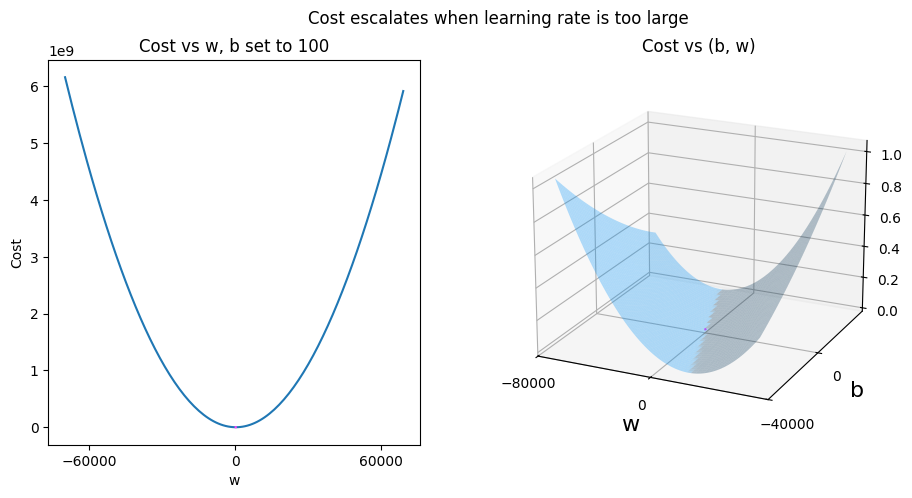

In [17]:
from matplotlib.ticker import MaxNLocator

def plt_divergence(p_hist, J_hist, x_train,y_train):

    x=np.zeros(len(p_hist))
    y=np.zeros(len(p_hist))
    v=np.zeros(len(p_hist))
    for i in range(len(p_hist)):
        x[i] = p_hist[i][0]
        y[i] = p_hist[i][1]
        v[i] = J_hist[i]

    fig = plt.figure(figsize=(12,5))
    plt.subplots_adjust( wspace=0 )
    gs = fig.add_gridspec(1, 5)
    fig.suptitle(f"Cost escalates when learning rate is too large")
    #===============
    #  First subplot
    #===============
    ax = fig.add_subplot(gs[:2], )

    # Print w vs cost to see minimum
    fix_b = 100
    w_array = np.arange(-70000, 70000, 1000, dtype="int64")
    cost = np.zeros_like(w_array,float)

    for i in range(len(w_array)):
        tmp_w = w_array[i]
        cost[i] = compute_cost(x_train, y_train, tmp_w, fix_b)

    # Define colors
    dlmagenta = '#ff40ff'
    dlblue = '#0096ff'

    ax.plot(w_array, cost)
    ax.plot(x,v, c=dlmagenta)
    ax.set_title("Cost vs w, b set to 100")
    ax.set_ylabel('Cost')
    ax.set_xlabel('w')
    ax.xaxis.set_major_locator(MaxNLocator(2))

    #===============
    # Second Subplot
    #===============

    tmp_b,tmp_w = np.meshgrid(np.arange(-35000, 35000, 500),np.arange(-70000, 70000, 500))
    tmp_b = tmp_b.astype('int64')
    tmp_w = tmp_w.astype('int64')
    z=np.zeros_like(tmp_b,float)
    for i in range(tmp_w.shape[0]):
        for j in range(tmp_w.shape[1]):
            z[i][j] = compute_cost(x_train, y_train, tmp_w[i][j], tmp_b[i][j] )

    ax = fig.add_subplot(gs[2:], projection='3d')
    ax.plot_surface(tmp_w, tmp_b, z,  alpha=0.3, color=dlblue)
    ax.xaxis.set_major_locator(MaxNLocator(2))
    ax.yaxis.set_major_locator(MaxNLocator(2))

    ax.set_xlabel('w', fontsize=16)
    ax.set_ylabel('b', fontsize=16)
    ax.set_zlabel('\ncost', fontsize=16)
    plt.title('Cost vs (b, w)')
    # Customize the view angle
    ax.view_init(elev=20., azim=-65)
    ax.plot(x, y, v,c=dlmagenta)

    return


plt_divergence(p_hist, J_hist,x_train, y_train)
plt.show()